## Olympic dataset

In [3]:
# 1. PRINT THE SHAPE
#     Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
#   Read the dataset
df = pd.read_csv('olympics.csv')
print(df.shape)

(271116, 17)


# Describe the age column

In [4]:
print(df['Age'].describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


## Print numeric datatypes

In [5]:
print(df.select_dtypes(include = np.number).columns.tolist())

['ID', 'Age', 'Height', 'Weight', 'Year']


## Null Values

In [6]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [7]:
x = df.isnull().sum()
for i in range(len(x)):
    if x.values[i] != 0:
        print(x.index[i],"-",x.values[i])

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


# Handling missing values

In [8]:
## Droping the height, weight and notes columns
df = pd.read_csv('olympics.csv')
df.drop(columns = ['Height','Weight','notes'],inplace=True)
df.dropna(subset=['region'],inplace=True)
print(df.shape)

(270746, 14)


## Replacing the missing values

In [9]:
df['Medal'].fillna('DNW',inplace=True)
counts = df['Medal'].value_counts()
counts

DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64

# STATISTICAL ANALYSIS

## HANDLING MISSING VALUES WITH MEAN

In [10]:
df['Age'] = df.groupby(['Sport'])['Age'].transform(lambda x: x.fillna(x.mean()))
print(round(df['Age'].mean(),0))
df.to_csv('Olympics_cleaned.csv',index=False)
n_df = pd.read_csv('Olympics_cleaned.csv')


26.0


## Probability age distribution

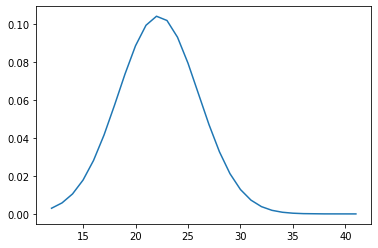

20 to 25


In [48]:
age= n_df['Age']
swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) & (olympics["Year"] <= 2016)]["Age"]

swimming_age = sorted(swimming_age)

mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)

probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)

plt.plot(swimming_age, probability_pdf)
plt.show()

print("20 to 25")


## Find skewness

In [12]:
import scipy.stats as stats
india_gold = n_df[(n_df['region'] == 'India') & (n_df['Medal'] == "Gold")]
values = india_gold.groupby('Year')['Medal'].value_counts()
if stats.skew(values, bias=False) >0:
    print('Right Skewed')
else:
    print('Left Skewed')


Left Skewed


## Standard Deviation of Gold Medals

In [13]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')



london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]

gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts()

london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]

gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts()

host_stdev = statistics.stdev(gold_count_host)

non_host_stdev = statistics.stdev(gold_count_non_host)

print(host_stdev)
print(non_host_stdev)

71.97453253292676
18.14528124684469


## Standarize the data

In [47]:
shooting = n_df[n_df['Sport'] == 'Shooting']['Age']
original_mean = statistics.mean(shooting)
original_sd = statistics.stdev(shooting)
standardized_age = []
for i in shooting:
    standardized_age.append((i-original_mean)/original_sd)

standardized_mean = statistics.mean( standardized_age)
standardized_sd = statistics.stdev( standardized_age)

print(round(standardized_mean))
print(round(standardized_sd))


0
1


## Correlation analysis

In [15]:
labels, categories = pd.factorize(n_df['Medal'])
n_df['Medal_labels'] = labels
cott = n_df['Age'].corr(n_df['Medal_labels'])
if cott > 0:
    print("positve")
else:
    print("negative")

positve


## IQR age 

In [16]:
age = n_df['Age']
q1 = np.quantile(age,0.25)
q2 = np.quantile(age,0.75)
iqr = q2 - q1
print(iqr)

6.0


# Summer Olympics Hosted

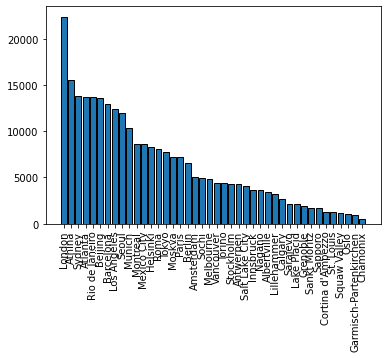

In [17]:
cities = n_df['City']
u_city = len(cities.unique())
h_city= cities.value_counts()
index_city = h_city.index
value_city = h_city.values
plt.bar(index_city, value_city,edgecolor='black')
plt.xticks(rotation = 90)
plt.show()

## SPORTS HAVING MOST NUMBER OF MEDALS

Athletics


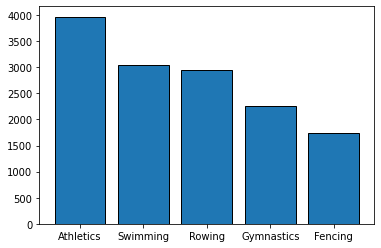

In [18]:
n_medals = n_df[n_df['Medal']!='DNW']
sports_group = n_medals.groupby(['Sport'])['Medal'].value_counts()
n_sports = sports_group.groupby(['Sport']).sum()
n_largest = n_sports.nlargest(5)
print(n_largest.index[0])

index_largest = n_largest.index
value_largest = n_largest.values
plt.bar(index_largest,value_largest,edgecolor = 'black')
plt.show()


# India's first gold medals

In [19]:
country = n_df[n_df['region']=='India']
medals = country[country['Medal']=='Gold']
medals = medals['Year']
medals = medals.min()
medals


1924

# Most number of players

Football Men's Football


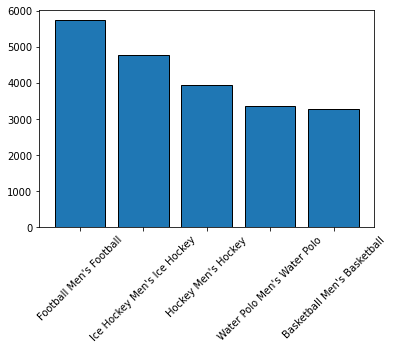

In [54]:
events = n_df['Event'].value_counts()
five_largest = events.nlargest(5)
five_largest
indexes = five_largest.index
values = five_largest.values
print(indexes[0])
plt.bar(indexes,values,edgecolor='black')
plt.xticks(rotation = 45)
plt.show()

# Most Female Gold Medalist

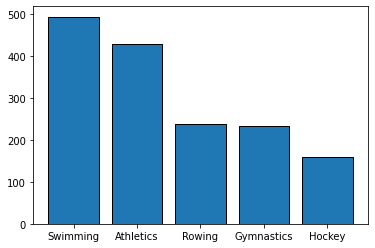

Swimming


In [21]:
cat, t_sex = pd.factorize(n_df['Sex'])
n_df['sex_labels'] = cat
f_player = n_df[(n_df['sex_labels']==1) & (n_df['Medal']=='Gold')]
group_player =f_player['Sport'].value_counts()

five_largest = group_player.nlargest(5)
plt.bar(five_largest.index, five_largest.values,edgecolor = 'black')
plt.show()
print(five_largest.index[0])

In [22]:
n_df

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_labels,sex_labels
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,0,0
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,0,0
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270741,135569,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland,0,0
270742,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland,0,0
270743,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland,0,0
270744,135571,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland,0,0
